In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras






Matplotlib is building the font cache; this may take a moment.


## Creating toy dataset for regression
Using numpy, we can create a one dimensional input array and evaluate a function with some added noise for the
true output values.

In [2]:
x=np.linspace(-20,20,10000) 
y=x**4-300*x**2+np.random.normal(0,1000,*x.shape) #bell shaped potential
y=200*np.sin(x)*np.exp(-np.absolute(x)/10.)+np.random.normal(0,10,*x.shape) #decaying sin wave



## Data Visualization
We visualize a small subset of the data using matplotlib

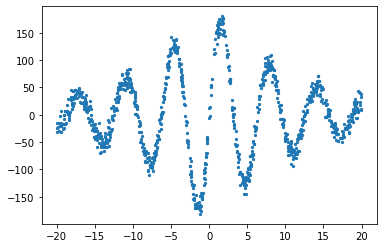

In [3]:
choice=np.random.randint(0,len(x),1000)
plt.scatter(x[choice],y[choice],s=5)

## Divide training and validation datasets
We divide the x and y value to training and validation datasets using numpy methods. 
It is also available in scikit-learn as [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 

In [4]:
all_inds=np.arange(len(x))
np.random.seed(145431)
np.random.shuffle(all_inds)
split_point=int(0.75*len(x))
x_train,y_train=x[all_inds[:split_point]],y[all_inds[:split_point]]
x_val,y_val=x[all_inds[split_point:]],y[all_inds[split_point:]]
print (x_train.shape,y_train.shape)
print (x_val.shape,y_val.shape)

(7500,) (7500,)
(2500,) (2500,)


## Create Sequential model 
We create a model using the Sequential API of keras. You can play around with the width and depth of the network to see the speed and the accuracy of the function approximation, and the speed of training for broader vs deeper networks. 

In [33]:
width=100
depth=3

model=Sequential()
model.add(Dense(width,input_shape=(1,),activation="relu",bias_initializer="glorot_normal"))
for _ in range(depth-1):
    model.add(Dense(width,activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.Adam())
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_41 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_42 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


## Training the model
We train the compiled model using the inbuilt fit method of keras models, and compare the predicted output of the network for each $n$ epochs. Note that we have used epoch=1 in the input to the fit method for each of handling the plotting. For actual training purposes, the number of epochs should be directly fed into the fit method.

Epoch: 5


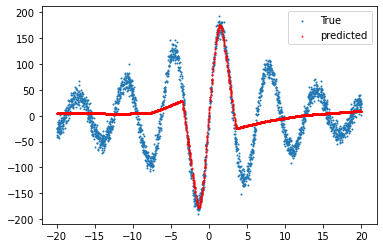

Epoch: 10


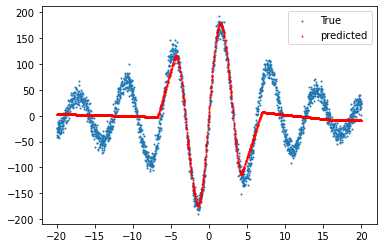

Epoch: 15


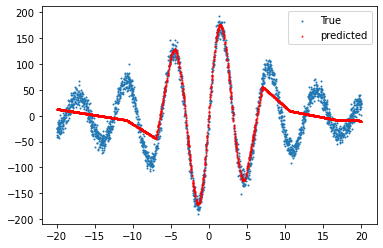

Epoch: 20


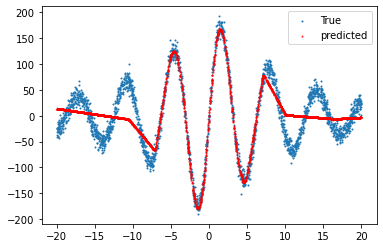

Epoch: 25


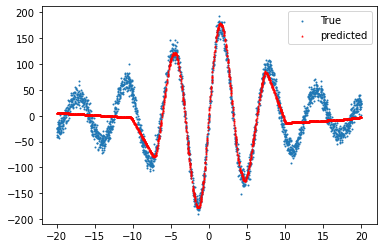

Epoch: 30


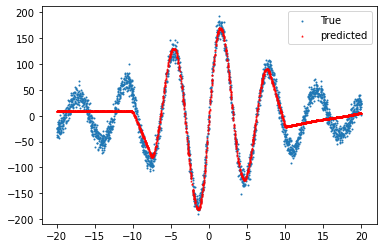

Epoch: 35


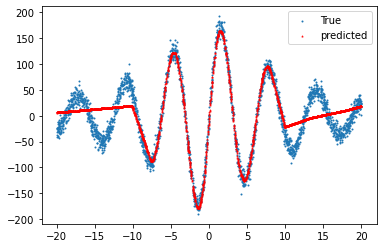

Epoch: 40


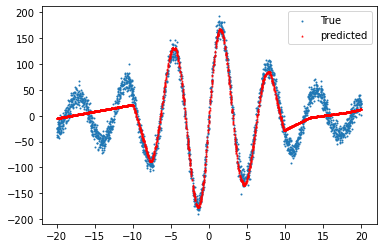

Epoch: 45


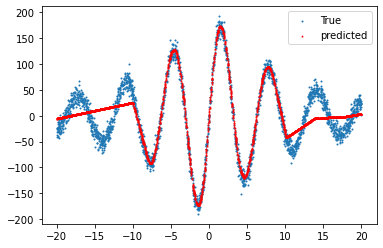

Epoch: 50


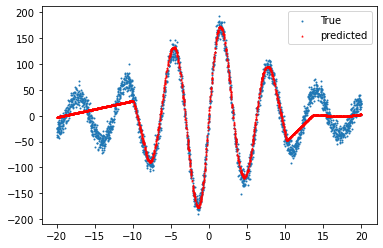

Epoch: 55


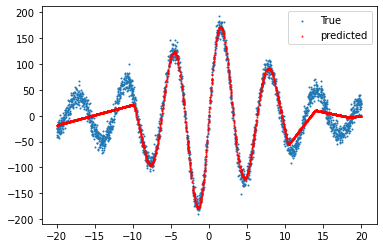

Epoch: 60


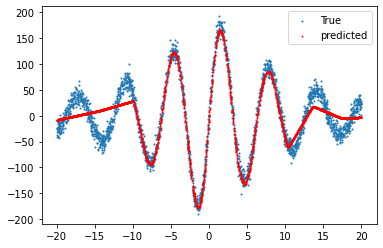

Epoch: 65


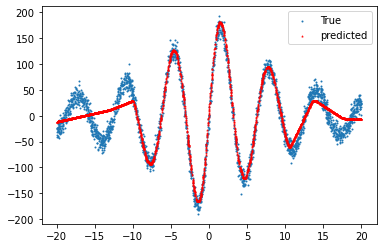

Epoch: 70


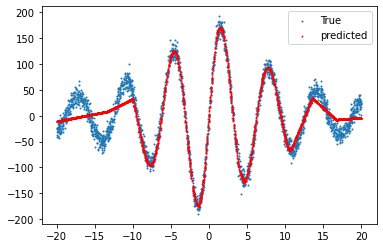

Epoch: 75


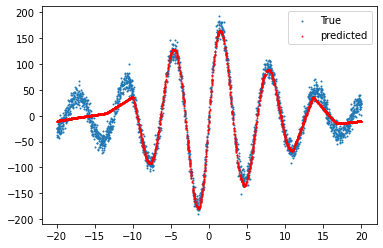

Epoch: 80


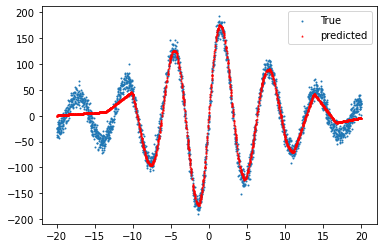

Epoch: 85


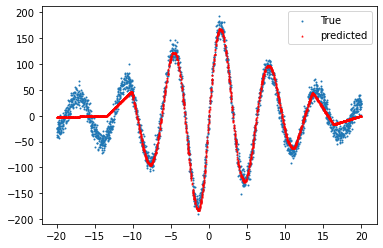

Epoch: 90


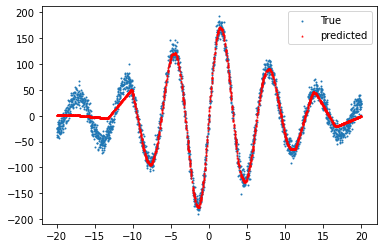

Epoch: 95


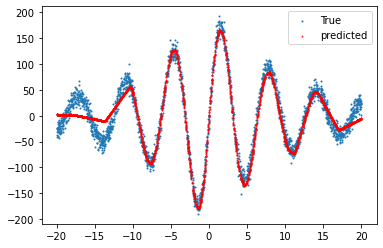

Epoch: 100


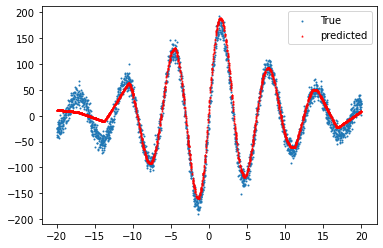

Epoch: 105


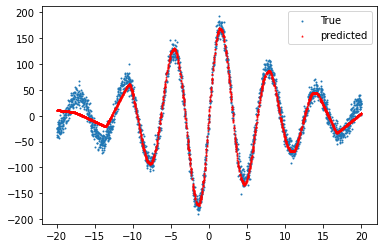

Epoch: 110


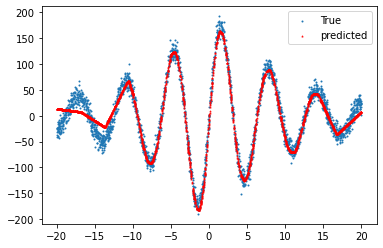

Epoch: 115


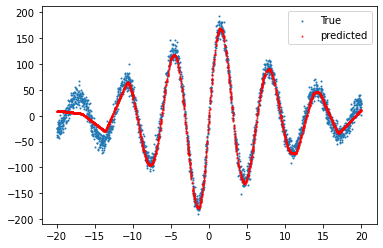

Epoch: 120


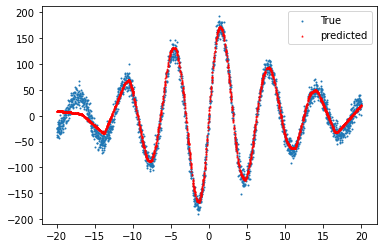

Epoch: 125


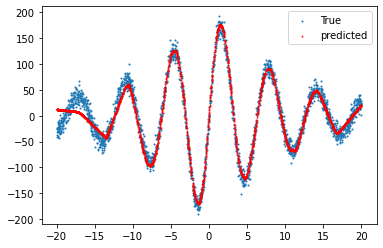

Epoch: 130


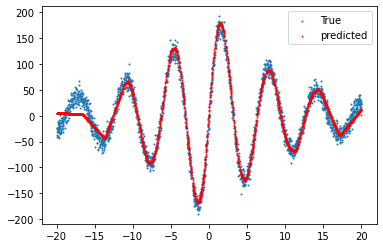

Epoch: 135


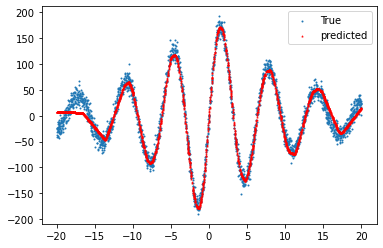

Epoch: 140


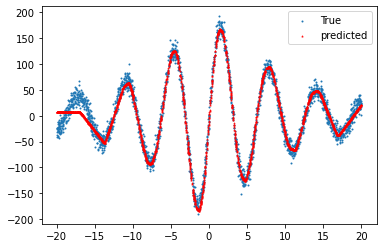

Epoch: 145


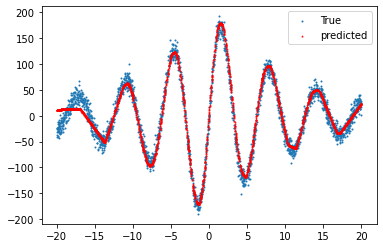

Epoch: 150


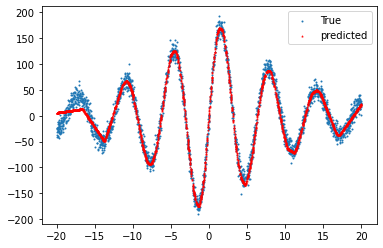

Epoch: 155


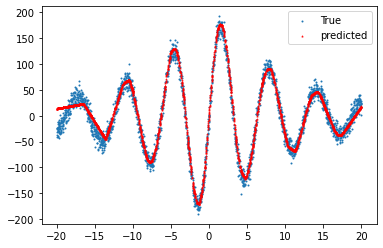

Epoch: 160


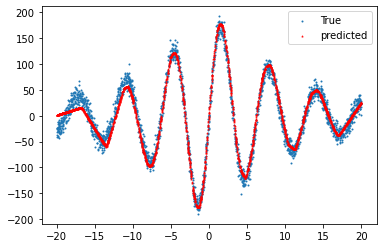

Epoch: 165


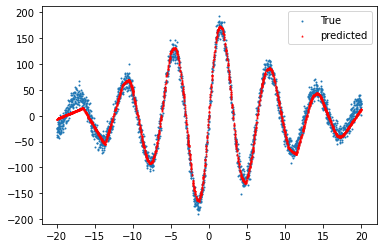

Epoch: 170


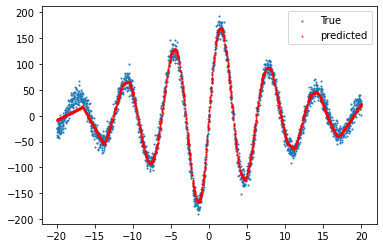

Epoch: 175


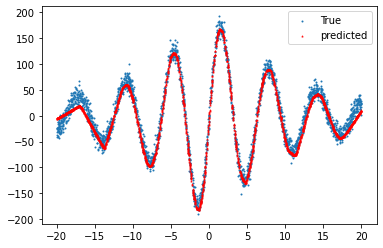

Epoch: 180


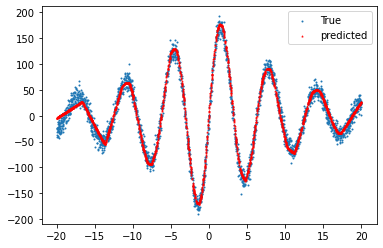

Epoch: 185


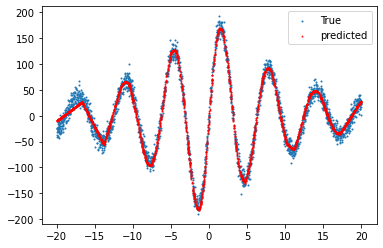

Epoch: 190


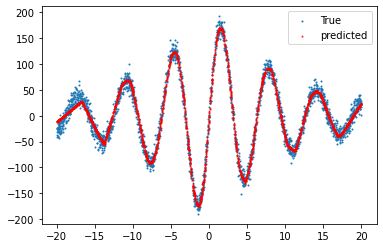

Epoch: 195


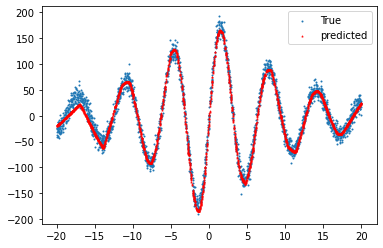

Epoch: 200


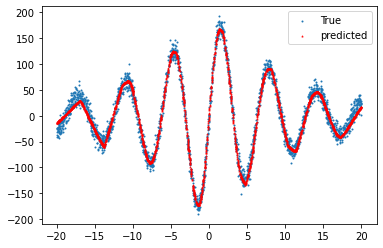

In [34]:
n=5
for _ in range(1,201):
  model.fit(x_train,y_train,epochs=1,batch_size=100,verbose=0,validation_data=(x_val,y_val))
  
  if _%n==0:
      y_val_pred=model.predict(x_val)
      print ("Epoch:",_)
      plt.scatter(x_val,y_val,marker="o",s=1,label="True")
      plt.scatter(x_val,y_val_pred,marker="^",c="r",s=1,label="predicted")
      plt.legend(loc="best")
      plt.show()